# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:



# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))


        

{
    "coord": {
        "lon": -52.73,
        "lat": 47.67
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 63.05,
        "feels_like": 55.13,
        "temp_min": 60.01,
        "temp_max": 64.99,
        "pressure": 999,
        "humidity": 77
    },
    "visibility": 10000,
    "wind": {
        "speed": 17.22,
        "deg": 180,
        "gust": 24.16
    },
    "clouds": {
        "all": 90
    },
    "dt": 1598548007,
    "sys": {
        "type": 1,
        "id": 998,
        "country": "CA",
        "sunrise": 1598517808,
        "sunset": 1598566896
    },
    "timezone": -9000,
    "id": 6167817,
    "name": "Torbay",
    "cod": 200
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Warri
Processing Record 2 | Manggar
Processing Record 3 | Tuktoyaktuk
Processing Record 4 | Hoquiam
Processing Record 5 | Bredasdorp
Processing Record 6 | Yaan
Processing Record 7 | Lebu
Processing Record 8 | Cape Town
Processing Record 9 | Zyryanka
Processing Record 10 | Philadelphia
Processing Record 11 | Mindelo
City not found. Skipping...
Processing Record 12 | Moose Factory
Processing Record 13 | Chokurdakh
Processing Record 14 | Kavaratti
Processing Record 15 | Khovd
Processing Record 16 | Tarancón
Processing Record 17 | Kaitangata
Processing Record 18 | Leshukonskoye
Processing Record 19 | Shitanjing
Processing Record 20 | Salym
Processing Record 21 | Punta Arenas
Processing Record 22 | Viedma
Processing Record 23 | Ahipara
Processing Record 24 | Atuona
Processing Record 25 | Castro
Processing Record 26 | Nushki
Processing Record 27 | Mataura
Processing Record 28 | Najrān
Processing Record 29 | Uruaçu

Processing Record 228 | Punta Alta
Processing Record 229 | Mörfelden-Walldorf
Processing Record 230 | Marondera
Processing Record 231 | Esna
Processing Record 232 | Antofagasta
Processing Record 233 | Kiruna
Processing Record 234 | Izhma
Processing Record 235 | Rasulnagar
Processing Record 236 | Gazli
Processing Record 237 | Montrose
Processing Record 238 | Porto Belo
City not found. Skipping...
Processing Record 239 | Nicoya
Processing Record 240 | Dharampur
Processing Record 241 | Saldanha
Processing Record 242 | Māndal
Processing Record 243 | Kununurra
Processing Record 244 | Deer Lake
Processing Record 245 | Ossora
Processing Record 246 | Morgan City
Processing Record 247 | Oranjemund
Processing Record 248 | Leningradskiy
Processing Record 249 | Colombia
Processing Record 250 | Sola
Processing Record 251 | Gubkinskiy
City not found. Skipping...
Processing Record 252 | Pāsighāt
Processing Record 253 | Cam Ranh
Processing Record 254 | San Miguel de Cozumel
Processing Record 255 | Mwa

Processing Record 456 | Gualeguay
Processing Record 457 | Angoche
City not found. Skipping...
Processing Record 458 | Itacoatiara
Processing Record 459 | León
Processing Record 460 | Gravdal
Processing Record 461 | Takaka
Processing Record 462 | Bentiu
Processing Record 463 | Drezdenko
Processing Record 464 | Ushumun
Processing Record 465 | Zhumadian
Processing Record 466 | Baijiantan
Processing Record 467 | Farah
Processing Record 468 | Maceió
Processing Record 469 | Cap Malheureux
Processing Record 470 | Ukiah
Processing Record 471 | Colares
Processing Record 472 | Vysokogornyy
Processing Record 473 | Kungurtug
Processing Record 474 | Tabou
Processing Record 475 | Novikovo
Processing Record 476 | Vredendal
Processing Record 477 | Zhezkazgan
Processing Record 478 | Lixouri
Processing Record 479 | Sapouy
Processing Record 480 | Imbituba
Processing Record 481 | Scarborough
Processing Record 482 | Belyy Yar
Processing Record 483 | Rock Sound
Processing Record 484 | Mercedes
City not foun

In [12]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               556
Country            556
Date               556
Latitude           556
Longitude          556
Max Temperature    556
Humidity           556
Cloudiness         556
Wind Speed         556
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

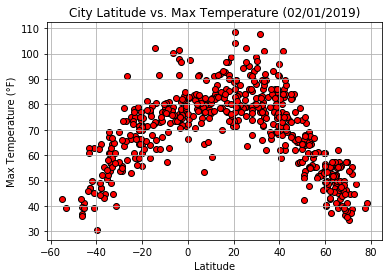

In [17]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

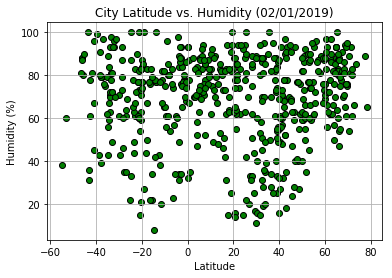

In [18]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

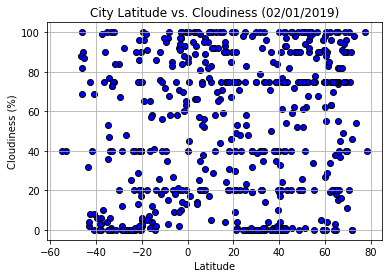

In [19]:


# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()



## Latitude vs. Wind Speed Plot

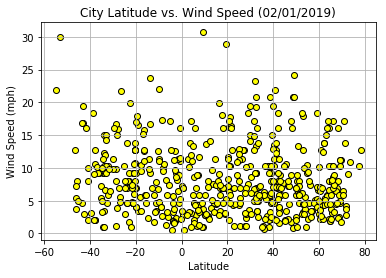

In [20]:


# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()



## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


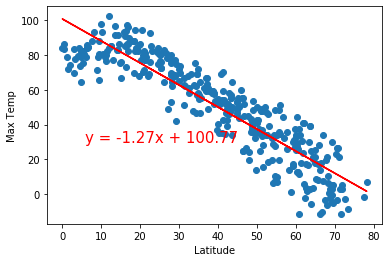

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


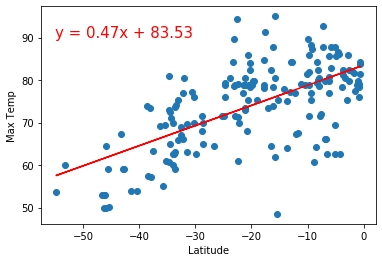

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


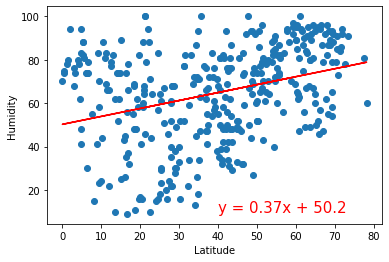

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


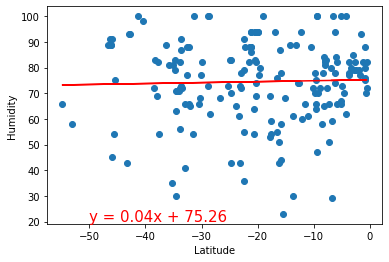

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


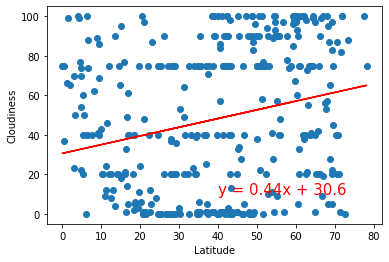

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


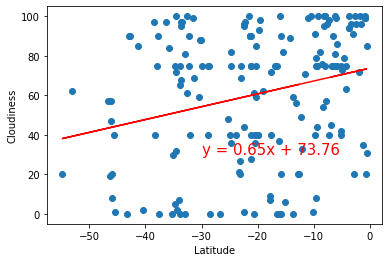

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


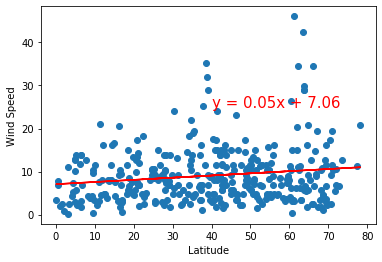

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


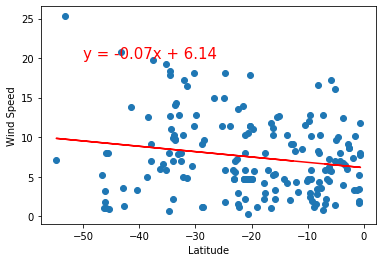